## Markov Chain Monte Carlo (MCMC)

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as stats

[0.36653452 0.07248609 0.56097939]


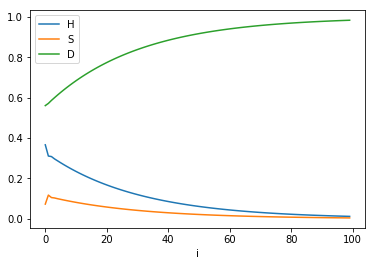

In [218]:
# Transition matrix
T = np.array([[0.69,0.3,0.01],[0.8,0.1,0.1],[0.0,0.0,1.0]])

# Random Initial State
p = np.random.uniform(low=0,high=1,size=3)
#normalize

p = p/np.sum(p)
print p
q = np.zeros((100,3))
for i in np.arange(0,100):
    q[i,:] = np.dot(p,np.linalg.matrix_power(T,i))

plt.plot(q)
plt.xlabel('i')
plt.legend(('H','S','D'))
plt.show()

## Markov chain sampling
sample from p(x) = 6x(1-x)

/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


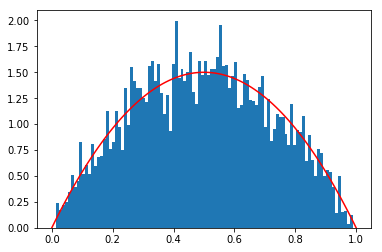

In [219]:
# Metropolis-Hasting algorithm
def p(x):
    return 6*x*(1-x)

#sample size
NUM = 10000

#proposal distribution (Gausian)
sig = 0.5

#intital state
x0 = np.random.uniform()

#previos state
x_prev = x0

#list that stores all states
x = []

for i in xrange(NUM):
    x_star = np.random.normal(x_prev,sig)
    P_star = p(x_star)
    P_prev = p(x_prev)
    A = P_star/P_prev
    
    #generate a random number between 0 and 1
    U = np.random.uniform()
    if (A>U):
        #accept
        x_prev = x_star
    x.append(x_prev)
plt.hist(x,bins=100,normed=True,label='MCMC')
xx = np.linspace(0,1,100)
plt.plot(xx,p(xx),color = 'red',label='true distribution')
plt.legend
plt.show()

In [220]:
# metropolis sampling function
def metropolis(n_iterations, initial_values, prop_sd = [1,1]):
    n_params = len(initial_values)
    
    trace = np.empty((n_iterations+1,n_params))
    
    trace[0] = initial_values
    
    # compute the joint posterior for inital values
    current_prob = posterior(*trace[0])
    
    accepted = [0]*n_params
    
    for i in range(n_iterations):
        current_params = trace[i]
        p = trace[i].copy()
        
        for j in range(n_params):
            theta = np.random.normal(current_params[j],prop_sd[j])
            
            p[j] = theta
            
            # compute posterior with proposed value
            proposed_prob = posterior(*p)
            
            alpha = proposed_prob/current_prob
            
            u = np.random.rand()
            
            if (u < alpha):
                # accept
                trace[i+1,j] = theta
                current_prob = proposed_prob
                accepted[j]+=1
            else:
                # reject
                trace[i+1,j] = trace[i,j]
            
            # update p so we can search the next dimension according to the current result
            p[j] = trace[i+1,j]
            
    return trace,accepted

In [221]:
n = 5
X = np.array([-0.86,-0.3,-0.05,0.73])
Y = np.array([0,1,3,5])

def logitInv(x):
    return np.exp(x)/(1.0+np.exp(x))

# posterior
def posterior(alpha,beta,y=Y,x=X):
    p = np.product((logitInv(alpha+beta*x)**y)*(1.0-logitInv(alpha+beta*x))**(n-y))
    return p


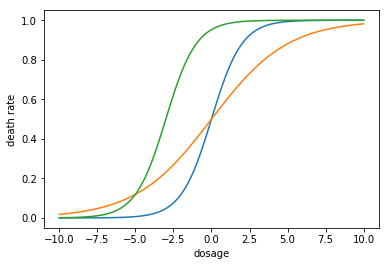

In [222]:
xx = np.linspace(-10,10,100)
plt.plot(xx,logitInv(xx),label='alpha=1 beta=0')
plt.plot(xx,logitInv(0.4*xx),label='alpha=4 beta=0')
plt.plot(xx,logitInv(xx+3),label='alpha=1 beta=3')
plt.xlabel('dosage')
plt.ylabel('death rate')
plt.show()

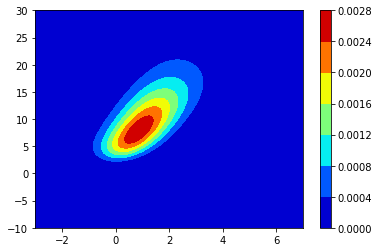

In [223]:
x1=np.linspace(-3,7,100)
x2=np.linspace(-10,30,100)
pos=np.zeros((100,100))
k = 0
for xx1 in x1:
    j = 0
    for xx2 in x2:
        pos[k,j] = posterior(xx1,xx2)
        j+=1
    k +=1
plt.contourf(x1,x2,pos.T,cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [224]:
n_iter = 10000
acc_ratios = []
alpha0 = np.random.rand(1)*10-3
beta0 = np.random.rand(1)*40-10
trace,acc = metropolis(n_iter,(alpha0,beta0),[3.0,12.0])
acc_ratios.append(acc/np.double(n_iter))

/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/ernie/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


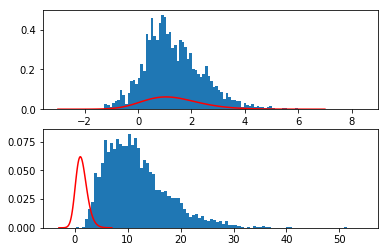

In [225]:
alpha = trace[:,0]
beta = trace[:,1]

plt.subplot(2,1,1)
plt.hist(alpha,bins=100,normed=True)
xx = np.linspace(-3,7,100)
pos_alpha = np.sum(pos,axis=1)
plt.plot(xx,pos_alpha,color='red')

plt.subplot(2,1,2)
plt.hist(beta,bins=100,normed=True)
yy = np.linspace(-3,7,100)
pos_beta = np.sum(pos,axis=1)
plt.plot(yy,pos_beta,color='red')

plt.show()

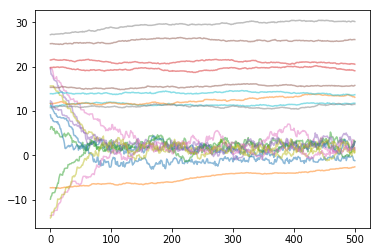

In [226]:
n_iter = 500
for i in range(10):
    start_alpha = np.random.rand(1)*40-20
    start_beta = np.random.rand(1)*40-10
    trace,acc = metropolis(n_iter,(start_alpha,start_beta),[0.5,0.05])
    plt.plot(trace,alpha=0.5)
plt.show()